# Worksite Safety Monitoring

## Group 2 (Matthieu, Dimitri, Leonard, Reda)

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

# Install detectron2

In [1]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 26.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=41875a520f797e1122e22d1b3330792f21df1ee84caa191f92b213d3a9391814
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/

In [2]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113
detectron2: 0.6


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

In [4]:
# if your files are on your google drive (e.g. when using colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def choose_random_image(directory):
    img_extension = ["png", "jpeg", "jpg"]  # Image Extensions to be chosen from
    all_images = list()
    for img in os.listdir(directory):  # Lists all files
        ext = img.split(".")[len(img.split(".")) - 1]
        if ext in img_extension:
            all_images.append(img)
    # choice = random.randint(0, len(allImages) - 1)
    # chosen_image = allImages[choice]  # Do Whatever you want with the image file
    random_image = random.choice(all_images)
    return os.path.join(directory, random_image)

In [6]:
#!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
folder = '/content/drive/MyDrive/Ponts/2A/Hackathon-eleven/data'
data = '/Detection_Train_Set/Detection_Train_Set_Img'
good_picks = []


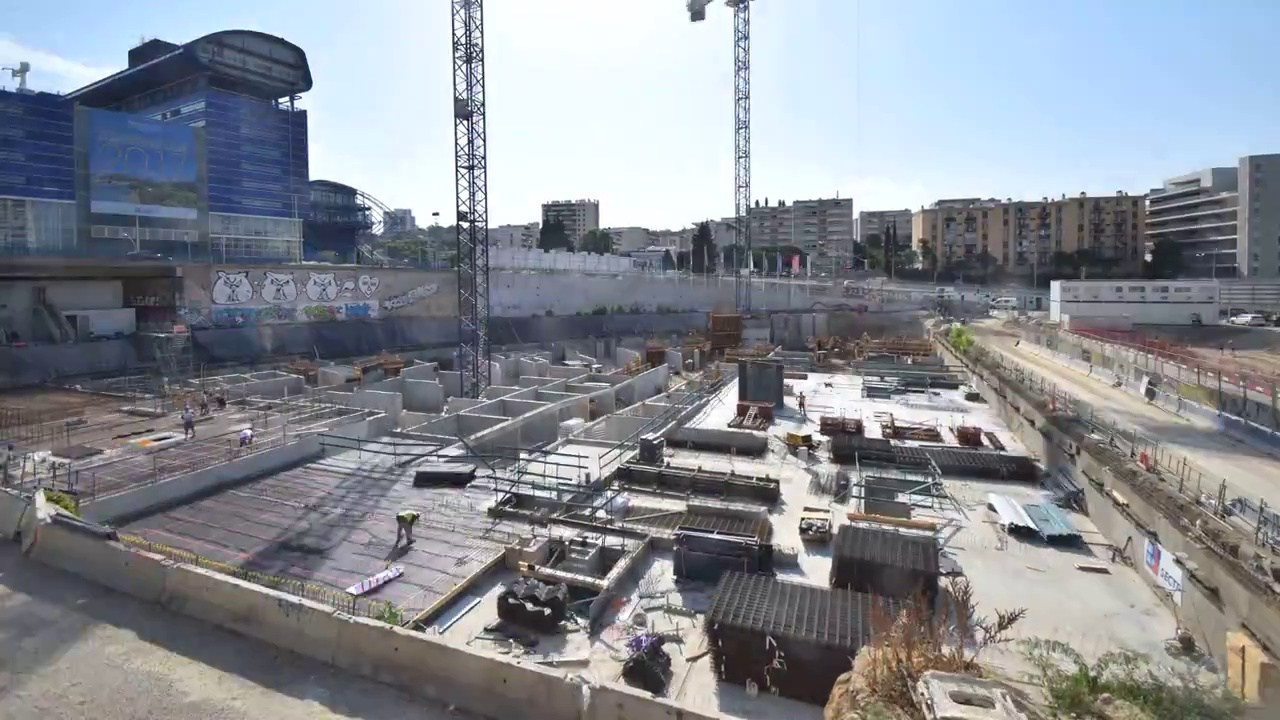

In [8]:
# Run this cell until you find a satisfying image
path = choose_random_image(folder + data)
im = cv2.imread(path)
cv2_imshow(im)

In [ ]:
good_picks.append(path)
print(good_picks)

['/content/drive/MyDrive/Ponts/2A/Hackathon-eleven/data/Detection_Train_Set/Detection_Train_Set_Img/Batch2__Marseille_01frame1381.jpg']


Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [9]:
# Run this cell for each image

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:05, 31.6MB/s]                           
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  7,  0,  8,  0, 58,  8], device='cuda:0')
Boxes(tensor([[ 181.4395,  404.7085,  195.7826,  439.9986],
        [ 798.2360,  463.6862,  854.3572,  539.2041],
        [ 797.0813,  391.3598,  806.2478,  416.2538],
        [ 814.7410,  375.4835, 1041.2120,  479.5470],
        [ 199.9484,  393.4893,  209.0411,  414.7296],
        [ 303.2255,  303.4170,  338.3270,  321.3482],
        [ 672.3316,  502.4610,  775.7376,  581.0599]], device='cuda:0'))


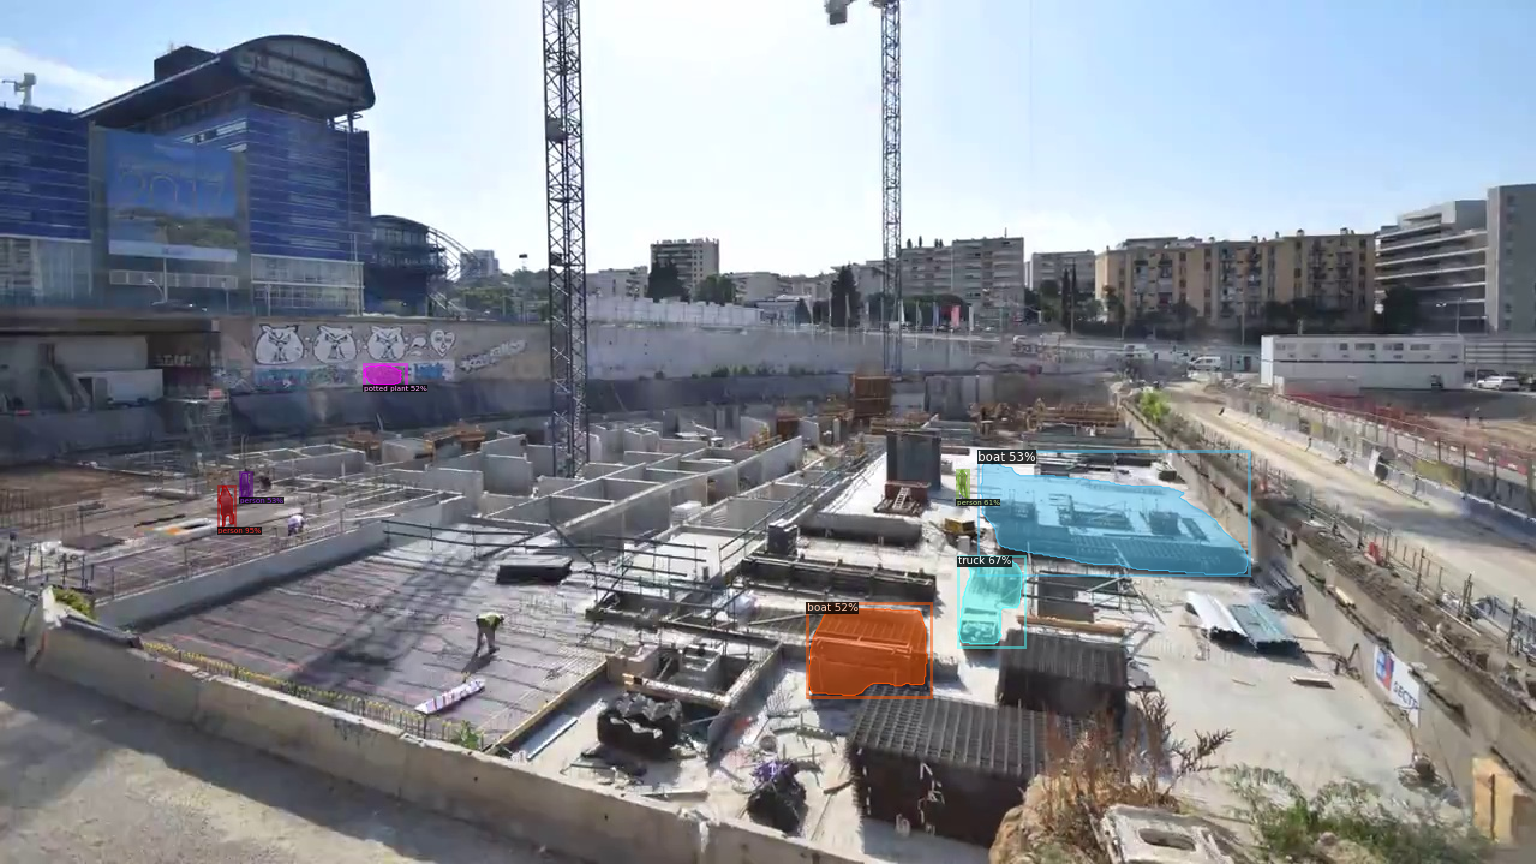

In [11]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

### Prediction of only 1 class using Detectron2

In [12]:
from detectron2.structures import Boxes

model_final_68b088.pkl: 421MB [00:22, 19.0MB/s]                           


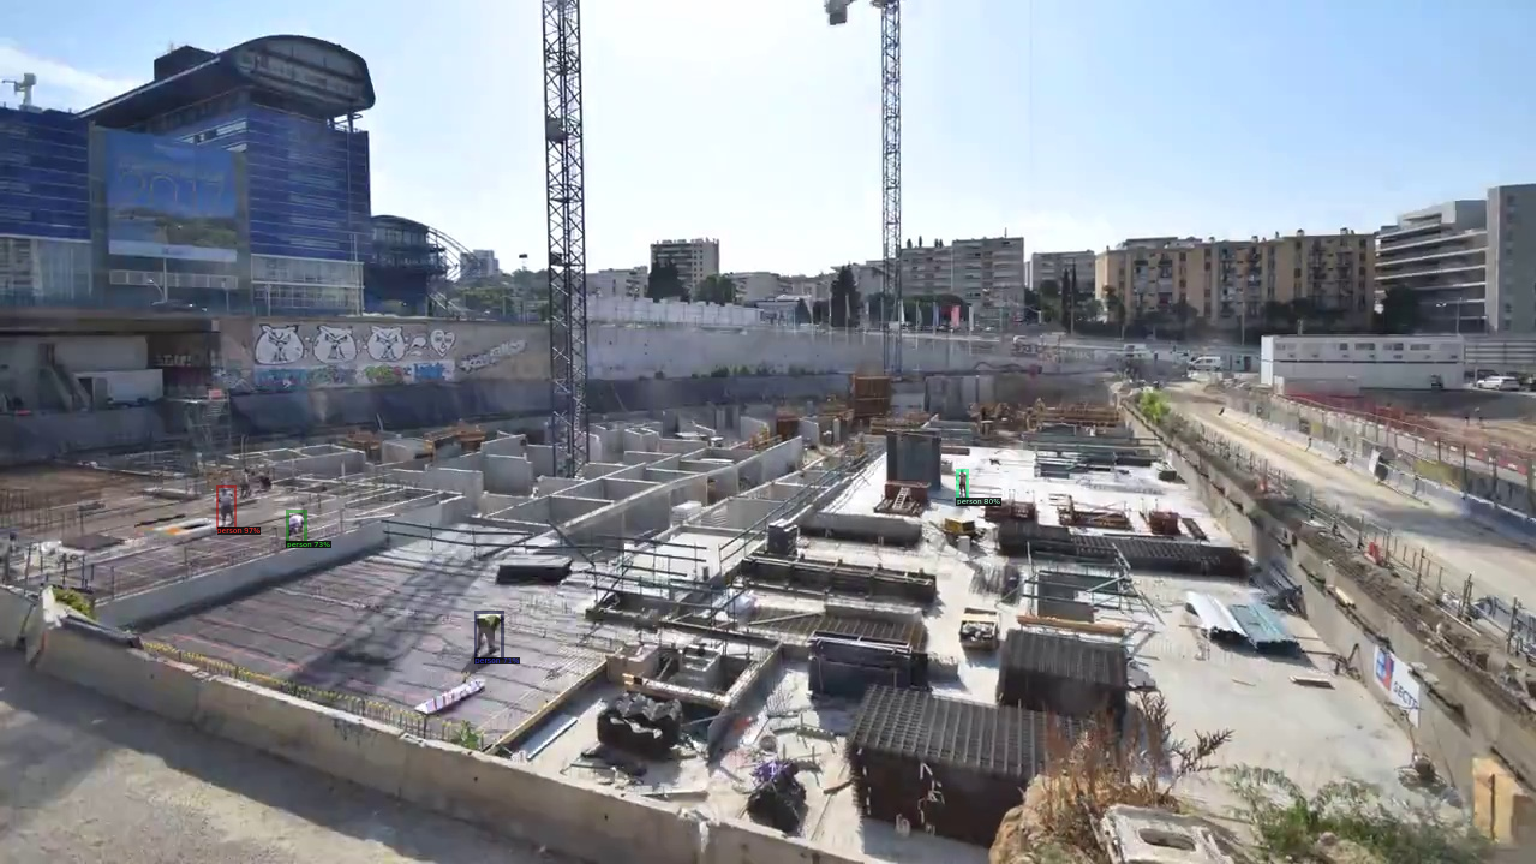

In [13]:
input_image_path = path

oim = cv2.imread(input_image_path)
#print('original image')
#cv2_imshow(im)
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.65  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
#cfg.MODEL.DEVICE = 'cpu' #changing to cpu
predictor = DefaultPredictor(cfg)

## Function for detecting and segmenting only 1 class i.e cups
def onlykeep_person_class(outputs):
  cls = outputs['instances'].pred_classes
  scores = outputs["instances"].scores
  boxes = outputs['instances'].pred_boxes

  # index to keep whose class == 0
  indx_to_keep = (cls == 0).nonzero().flatten().tolist()
    
  # only keeping index  corresponding arrays
  cls1 = torch.tensor(np.take(cls.cpu().numpy(), indx_to_keep))
  scores1 = torch.tensor(np.take(scores.cpu().numpy(), indx_to_keep))
  boxes1 = Boxes(torch.tensor(np.take(boxes.tensor.cpu().numpy(), indx_to_keep, axis=0)))
  
  # create new instance obj and set its fields
  obj = detectron2.structures.Instances(image_size=(oim.shape[0], oim.shape[1]))
  obj.set('pred_classes', cls1)
  obj.set('scores', scores1)
  obj.set('pred_boxes',boxes1)
  return obj

### predictions and only cup detection display
original_outputs = predictor(oim) #30 seconds(CPU) #1 seconds(GPU)
modified_outputs = onlykeep_person_class(original_outputs)


v = Visualizer(oim[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(modified_outputs.to("cpu"))
cv2.imwrite(input_image_path.replace(".","_only_person_detected."),out.get_image()[:, :, ::-1])
cv2_imshow(out.get_image()[:, :, ::-1])